In [1]:
#importing packages
import numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [13]:
#setting decimals behind 0 to 2
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

In [15]:
#importing data
raw_data = pd.read_csv('1.04.Real-life-example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,"4,200.00",sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,"7,900.00",van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,"13,300.00",sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,"23,000.00",crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,"18,300.00",crossover,120,2.00,Petrol,yes,2011,Rav 4


In [17]:
#data cleaning
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,"4,173.00",4345,"4,345.00","4,195.00",4345,4345,"4,345.00",4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,"19,418.75",NaN,161.24,2.79,NaN,NaN,"2,006.55",NaN
std,NaN,"25,584.24",NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,"1,969.00",NaN
25%,NaN,"6,999.00",NaN,86.00,1.80,NaN,NaN,"2,003.00",NaN
50%,NaN,"11,500.00",NaN,155.00,2.20,NaN,NaN,"2,008.00",NaN
75%,NaN,"21,700.00",NaN,230.00,3.00,NaN,NaN,"2,012.00",NaN


In [21]:
#removing irrelevant columsn
data = raw_data.drop(['Model'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,"4,173.00",4345,"4,345.00","4,195.00",4345,4345,"4,345.00"
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,"19,418.75",NaN,161.24,2.79,NaN,NaN,"2,006.55"
std,NaN,"25,584.24",NaN,105.71,5.07,NaN,NaN,6.72
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,"1,969.00"
25%,NaN,"6,999.00",NaN,86.00,1.80,NaN,NaN,"2,003.00"
50%,NaN,"11,500.00",NaN,155.00,2.20,NaN,NaN,"2,008.00"
75%,NaN,"21,700.00",NaN,230.00,3.00,NaN,NaN,"2,012.00"


In [25]:
#checking missing values
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [27]:
#making a new data set without missing values
data_no_mv = data.dropna(axis = 0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,"4,025.00",4025,"4,025.00","4,025.00",4025,4025,"4,025.00"
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,"19,552.31",NaN,163.57,2.76,NaN,NaN,"2,006.38"
std,NaN,"25,815.73",NaN,103.39,4.94,NaN,NaN,6.70
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,"1,969.00"
25%,NaN,"6,999.00",NaN,90.00,1.80,NaN,NaN,"2,003.00"
50%,NaN,"11,500.00",NaN,158.00,2.20,NaN,NaN,"2,007.00"
75%,NaN,"21,900.00",NaN,230.00,3.00,NaN,NaN,"2,012.00"


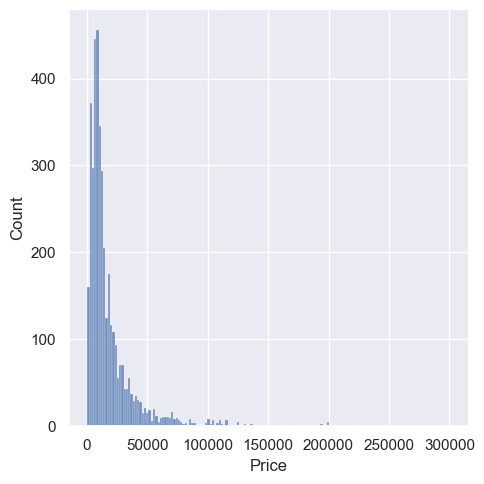

In [29]:
#checking outliers
#ploting columns
sns.displot(data_no_mv['Price'])

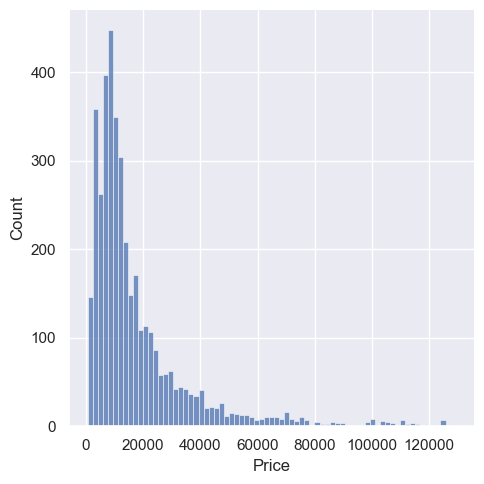

In [31]:
#dealing with outliers
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]
sns.displot(data_1['Price'])

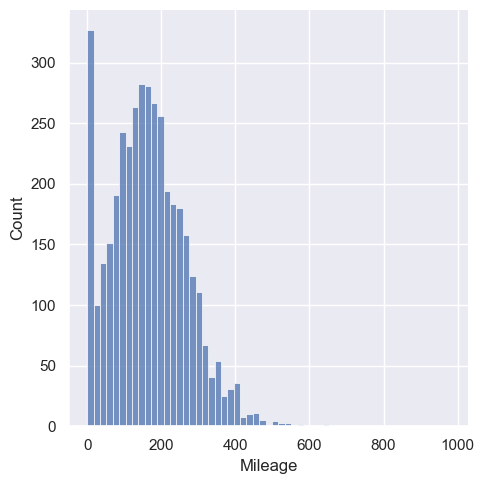

In [37]:
sns.displot(data_1['Mileage'])

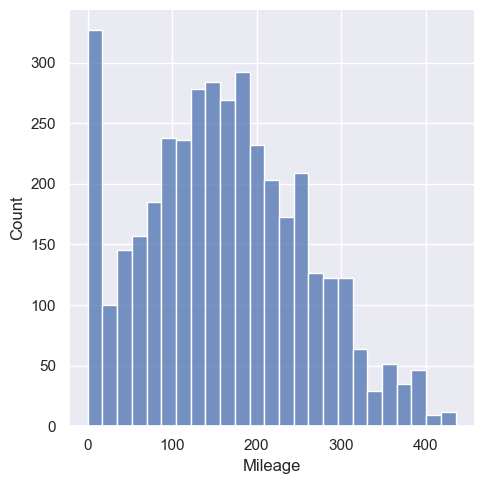

In [43]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]
sns.displot(data_2['Mileage'])

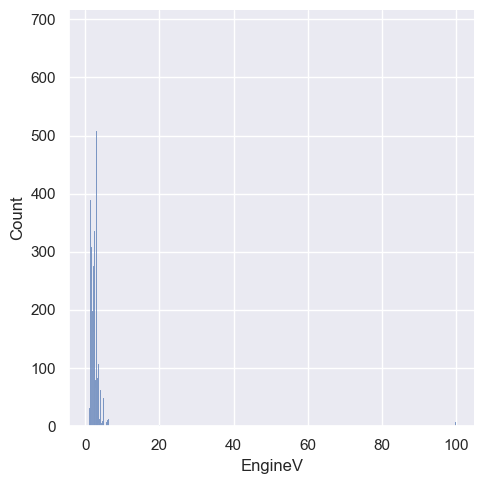

In [45]:
sns.displot(data_2['EngineV'])

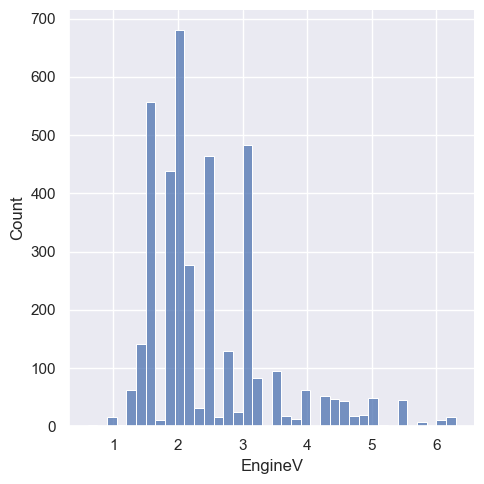

In [47]:
data_3 = data_2[data_2['EngineV'] < 6.5]
sns.displot(data_3['EngineV'])

In [53]:
data_3.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,"3,921.00",3921,"3,921.00","3,921.00",3921,3921,"3,921.00"
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,"17,988.42",NaN,161.28,2.44,NaN,NaN,"2,006.41"
std,NaN,"19,041.66",NaN,96.07,0.95,NaN,NaN,6.60
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,"1,969.00"
25%,NaN,"7,000.00",NaN,92.00,1.80,NaN,NaN,"2,003.00"
50%,NaN,"11,500.00",NaN,158.00,2.20,NaN,NaN,"2,008.00"
75%,NaN,"21,500.00",NaN,229.00,3.00,NaN,NaN,"2,012.00"


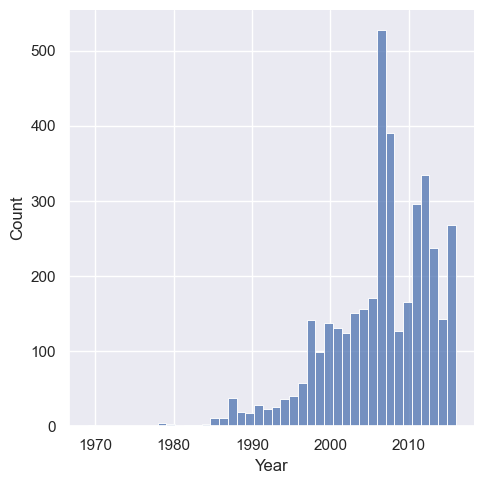

In [55]:
sns.displot(data_3['Year'])

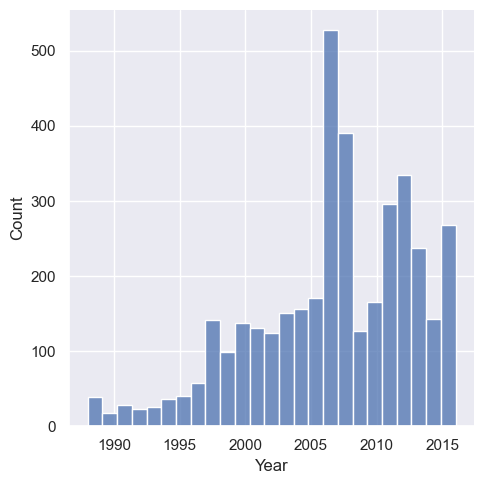

In [57]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > q]
sns.displot(data_4['Year'])

In [61]:
#checking the data after dealing with outliers
data_celaned = data_4
data_celaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,"3,867.00",3867,"3,867.00","3,867.00",3867,3867,"3,867.00"
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,"18,194.46",NaN,160.54,2.45,NaN,NaN,"2,006.71"
std,NaN,"19,085.86",NaN,95.63,0.95,NaN,NaN,6.10
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,"1,988.00"
25%,NaN,"7,200.00",NaN,91.00,1.80,NaN,NaN,"2,003.00"
50%,NaN,"11,700.00",NaN,157.00,2.20,NaN,NaN,"2,008.00"
75%,NaN,"21,700.00",NaN,225.00,3.00,NaN,NaN,"2,012.00"


In [63]:
data_celaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,"4,200.00",sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,"7,900.00",van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,"13,300.00",sedan,358,5.00,Gas,yes,2003
3,Audi,"23,000.00",crossover,240,4.20,Petrol,yes,2007
4,Toyota,"18,300.00",crossover,120,2.00,Petrol,yes,2011


In [65]:
#reseting the indexes of the celan data
data_celaned = data_celaned.reset_index(drop = True)
data_celaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,"3,867.00",3867,"3,867.00","3,867.00",3867,3867,"3,867.00"
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,"18,194.46",NaN,160.54,2.45,NaN,NaN,"2,006.71"
std,NaN,"19,085.86",NaN,95.63,0.95,NaN,NaN,6.10
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,"1,988.00"
25%,NaN,"7,200.00",NaN,91.00,1.80,NaN,NaN,"2,003.00"
50%,NaN,"11,700.00",NaN,157.00,2.20,NaN,NaN,"2,008.00"
75%,NaN,"21,700.00",NaN,225.00,3.00,NaN,NaN,"2,012.00"


Text(0.5, 1.0, 'EngineV & Price')

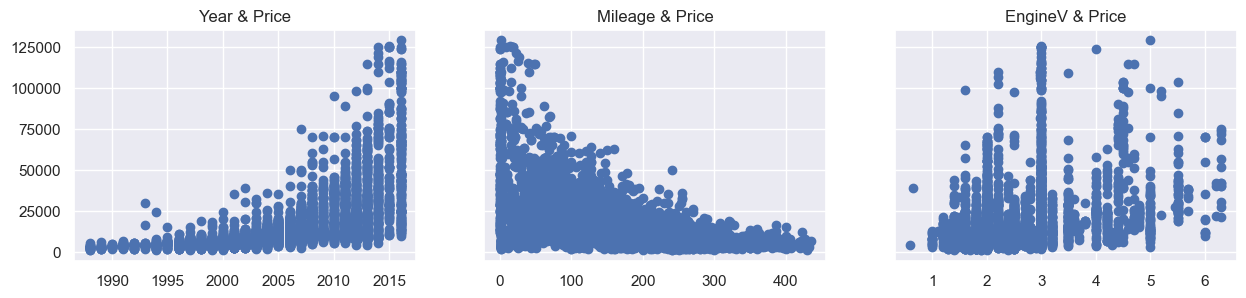

In [83]:
#checking the OLS assumption
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey= True, figsize = (15,3))
ax1.scatter(data_celaned['Year'], data_celaned['Price'])
ax1.set_title('Year & Price')
ax2.scatter(data_celaned['Mileage'], data_celaned['Price'])
ax2.set_title('Mileage & Price')
ax3.scatter(data_celaned['EngineV'], data_celaned['Price'])
ax3.set_title('EngineV & Price')

In [71]:
#Graphs are not linear so we are using log values(Relaxing) from price
log_price = np.log(data_celaned['Price'])
data_celaned['log_price'] = log_price
data_celaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,"4,200.00",sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,"7,900.00",van,427,2.90,Diesel,yes,1999,8.97
2,Mercedes-Benz,"13,300.00",sedan,358,5.00,Gas,yes,2003,9.50
3,Audi,"23,000.00",crossover,240,4.20,Petrol,yes,2007,10.04
4,Toyota,"18,300.00",crossover,120,2.00,Petrol,yes,2011,9.81


Text(0.5, 1.0, 'EngineV & log_price')

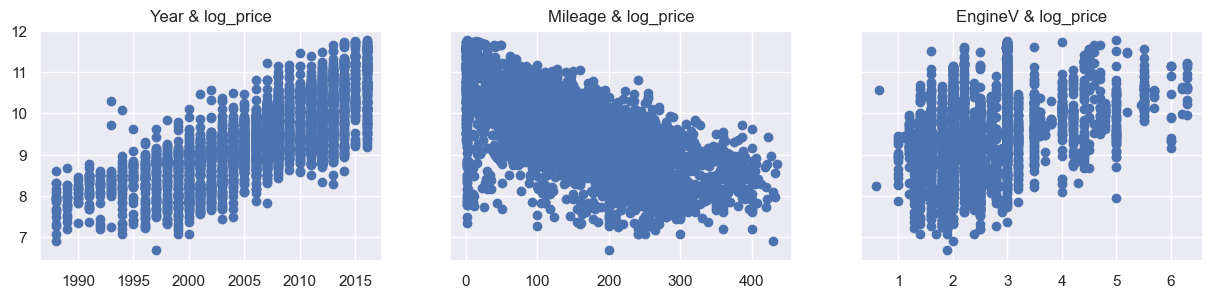

In [85]:
#AGAIN checking the OLS assumption
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey= True, figsize = (15,3))
ax1.scatter(data_celaned['Year'], data_celaned['log_price'])
ax1.set_title('Year & log_price')
ax2.scatter(data_celaned['Mileage'], data_celaned['log_price'])
ax2.set_title('Mileage & log_price')
ax3.scatter(data_celaned['EngineV'], data_celaned['log_price'])
ax3.set_title('EngineV & log_price')

In [105]:
#now we see that our graphs with log of price are linear
#removing column Price
#data_celaned = data_celaned.drop(['Price'], axis=1)
print(data_celaned.columns)
#price was already removed during one subbmition so now we would have to reset the code again or continue

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'log_price'],
      dtype='object')


In [107]:
#Multicollinearity
data_celaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [109]:
len(data_celaned.columns.values)

8

In [117]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_celaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.79,Mileage
1,10.35,Year
2,7.66,EngineV


In [119]:
#everything above 10.00 should be removed, doing that we create a data with no multicollinearity
data_no_multicollinearity = data_celaned.drop(['Year'], axis=1)

In [121]:
#creating data with dummies
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first= True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.34,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.90,8.97,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.00,9.50,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.20,10.04,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.00,9.81,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [123]:
#VIF with dummies
variables = data_celaned[['Mileage', 'EngineV']]
vif_dummies = pd.DataFrame()
vif_dummies["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif_dummies["Features"] = variables.columns
vif_dummies

,VIF,Features
0,2.81,Mileage
1,2.81,EngineV


In [125]:
#Rearanging columns so that log_price is first
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [127]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data_processed = data_with_dummies[cols]
data_processed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,277,2.00,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.97,427,2.90,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.50,358,5.00,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.04,240,4.20,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.81,120,2.00,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [131]:
#Linear Regression Model
#declaring inputs and targets
targets = data_processed['log_price']
inputs = data_processed.drop(['log_price'], axis=1)

In [133]:
#Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [135]:
#transforming inputs int scaled_inputs
inputs_scaled = scaler.transform(inputs)

In [145]:
#Train and Test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 365)

In [147]:
#Creating the regression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [149]:
#Ploting our regression
y_hat = reg.predict(x_train)

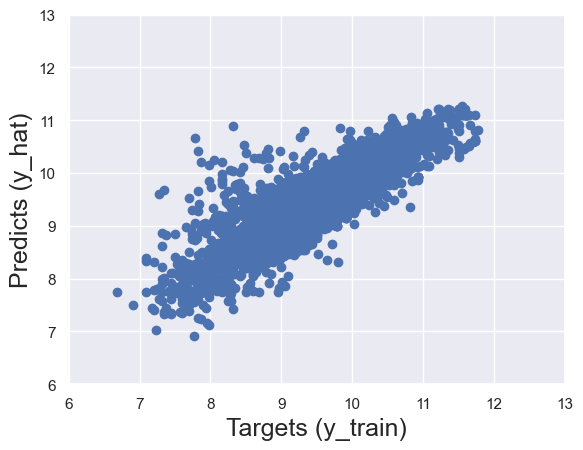

In [161]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predicts (y_hat)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

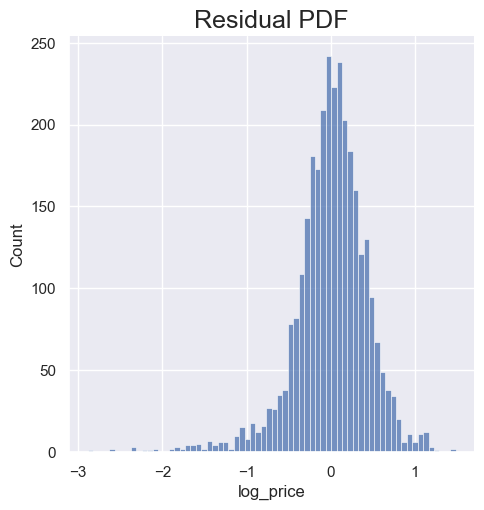

In [165]:
#ploting y train - y hat
sns.displot(y_train - y_hat)
plt.title("Residual PDF", size = 18)

In [167]:
#Finding R-squared
reg.score(x_train, y_train)

0.744996578792662

In [169]:
#Finding weight and bias
reg.intercept_

9.415239458021299

In [173]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [179]:
#Creating a reg summary
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weight'] = reg.coef_
reg_summary

,Features,Weight
0,Mileage,-0.45
1,EngineV,0.21
2,Brand_BMW,0.01
3,Brand_Mercedes-Benz,0.01
4,Brand_Mitsubishi,-0.14
5,Brand_Renault,-0.18
6,Brand_Toyota,-0.06
7,Brand_Volkswagen,-0.09
8,Body_hatch,-0.15
9,Body_other,-0.10


In [177]:
data_celaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [181]:
#Testing
y_hat_test = reg.predict(x_test)

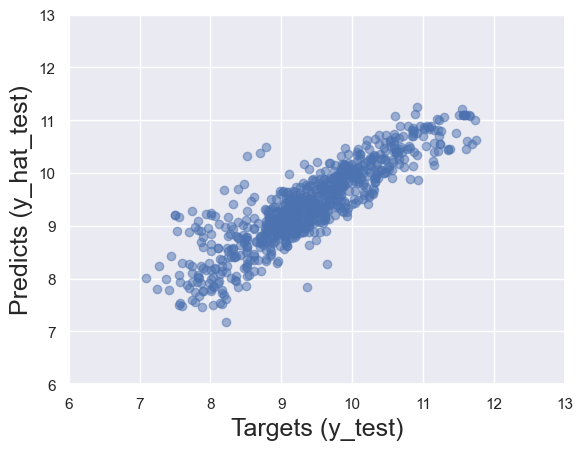

In [185]:
#plotting the test
plt.scatter(y_test, y_hat_test, alpha=0.5)
plt.xlabel('Targets (y_test)', size = 18)
plt.ylabel('Predicts (y_hat_test)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [189]:
#Creating a prediction data frame
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,9.28
1,8.16
2,8.93
3,8.92
4,9.34


In [191]:
#making the price not a log anymore - reverting it to the real price from the beginning
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,"10,685.50"
1,"3,499.26"
2,"7,553.29"
3,"7,463.96"
4,"11,353.49"


In [223]:
#adding a Target column to our df
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target,Residual,Difference%
0,"10,685.50","2,300.00",NaN,NaN
1,"3,499.26","2,800.00","4,400.74",55.71
2,"7,553.29","2,500.00",NaN,NaN
3,"7,463.96","6,400.00",NaN,NaN
4,"11,353.49","9,150.00",NaN,NaN


In [225]:
y_test.head()

0   7.74
1   7.94
2   7.82
3   8.76
4   9.12
Name: log_price, dtype: float64

In [227]:
#reseting the indexes of y_test
y_test = y_test.reset_index(drop = True)
y_test.head()

0   7.74
1   7.94
2   7.82
3   8.76
4   9.12
Name: log_price, dtype: float64

In [229]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target,Residual,Difference%
0,"10,685.50","2,300.00",NaN,NaN
1,"3,499.26","2,800.00","4,400.74",55.71
2,"7,553.29","2,500.00",NaN,NaN
3,"7,463.96","6,400.00",NaN,NaN
4,"11,353.49","9,150.00",NaN,NaN


In [231]:
#adding a column Residual = Target - Prediction
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [233]:
#adding a column Difference% = Residual / Target * 100
df_pf['Difference%'] = np.absolute(df_pf['Residual'] / df_pf['Target'] * 100)
df_pf.head()

,Prediction,Target,Residual,Difference%
0,"10,685.50","2,300.00","-8,385.50",364.59
1,"3,499.26","2,800.00",-699.26,24.97
2,"7,553.29","2,500.00","-5,053.29",202.13
3,"7,463.96","6,400.00","-1,063.96",16.62
4,"11,353.49","9,150.00","-2,203.49",24.08


In [235]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,"15,946.76","18,165.82","2,219.06",36.26
std,"13,133.20","19,967.86","10,871.22",55.07
min,"1,320.56","1,200.00","-29,456.50",0.06
25%,"7,413.64","6,900.00","-2,044.19",12.11
50%,"11,568.17","11,600.00",142.52,23.47
75%,"20,162.41","20,500.00","3,147.34",39.56
max,"77,403.06","126,000.00","85,106.16",512.69


In [219]:
#sorting of df by Difference%
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
109,"12,663.54","12,700.00",36.46,0.29
606,"20,680.40","20,500.00",-180.40,0.88
433,"6,977.90","6,900.00",-77.90,1.13
8,"11,581.54","11,950.00",368.46,3.08
330,"11,336.71","10,800.00",-536.71,4.97
...,...,...,...,...
768,"38,260.36",NaN,NaN,NaN
770,"10,732.07",NaN,NaN,NaN
771,"13,922.45",NaN,NaN,NaN
772,"27,487.75",NaN,NaN,NaN
